<a href="https://colab.research.google.com/github/VU-CSP/improc_assignment2-korra4now/blob/main/HW_5_CamrynSmith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import matplotlib.pyplot as plt # Library used for plotting
from matplotlib.patches import Rectangle # module to plot a rectangle in the image
import numpy as np # library for array manipulation
import seaborn as sn # plotting library
import pandas as pd # data frames library
import tifffile # library to store numpy arrays in TIFF
import skimage # Library for image manipulation
from skimage.io import imread # sublibrary from skimage
from scipy.ndimage import gaussian_filter
from skimage.filters import difference_of_gaussians
from skimage import transform
import os



In [2]:
import ipywidgets as widgets # Importing library
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and

In [4]:
#download image files
if not os.path.exists("./FISH_example.tif"):
   !wget -O FISH_example.tif "https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1"
if not os.path.exists("./image_cell.tif"):
    !wget -O image_cell.tif https://ndownloader.figshare.com/files/26751209
# reading the image and saving as variable img
img = imread('./image_cell.tif')
img.shape 

--2023-03-14 00:12:30--  https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/669j6zags6xd7gr/FISH_example.tif [following]
--2023-03-14 00:12:31--  https://www.dropbox.com/s/dl/669j6zags6xd7gr/FISH_example.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc88b909eb99ed1207173ac08ffa.dl.dropboxusercontent.com/cd/0/get/B4Ov0jJsdk_9gHhZo6o9l3rxZRvz8rdPjMcOjyyoIAB1UKt76f1rikekaJCAqx4rEm-v3CN1HX9II6kMs2rQYg5QZ_YUZq3Wzei9whZoGZZdjZY9jekJQ_iwK3GA2oMxJGeNtbs_4Uf3qkbNEiA8Fx1xzMw-bMwMTbjXVLSCVhJ9Tw/file?dl=1# [following]
--2023-03-14 00:12:31--  https://uc88b909eb99ed1207173ac08ffa.dl.dropboxusercontent.com/cd/0/get/B4Ov0jJsdk_9gHhZo6o9l3rxZRvz8rdPjMcOjyyoIAB1UKt76f1rikekaJCAqx4

(35, 512, 512, 3)

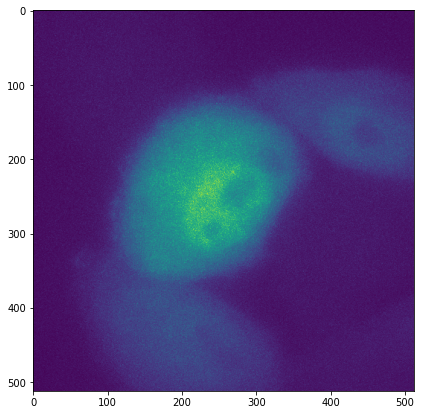

In [20]:
# Task 1
## make an image `img1` from just the red channel (channel 0) at time point 23 of the tensor [T,Y,X,C]  

# add your code here
img1=(img[23,:,:,0])
plt.figure(figsize=(7,7))
plt.imshow(img1) 
plt.show()


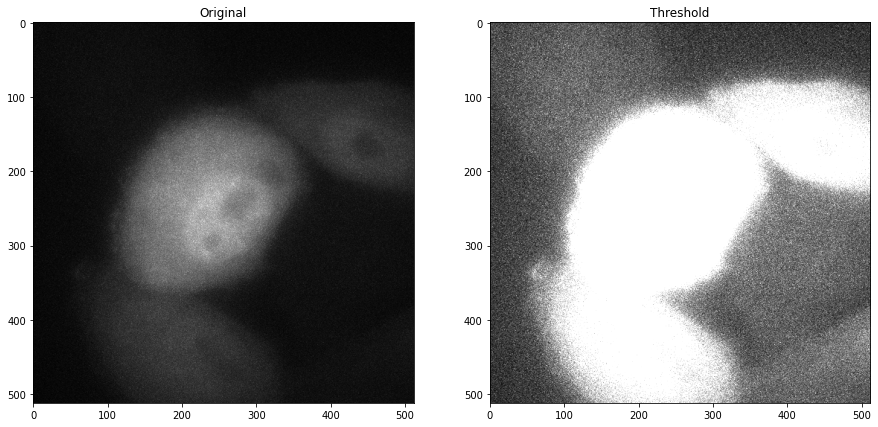

In [21]:
# Task 2
## Using `img1`, create a new image `img2` where values less than than the mean are set to the 
## background value (calculated as the minimum intensity value in the image).

img2 = img1.copy() # making a copy of our img
img2[img2 > np.mean(img2) ]=np.mean(img2)  # thresholding image values larger than the mean equal to the mean.

fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].imshow(img1,cmap='gray')
ax[0].set(title='Original')

ax[1].imshow(img2,cmap='gray')
ax[1].set_title('Threshold')
plt.show()


Transformation matrix : 
 [[ 4.97260948e-01 -5.22642316e-02  2.00000000e+02]
 [ 5.22642316e-02  4.97260948e-01  1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 



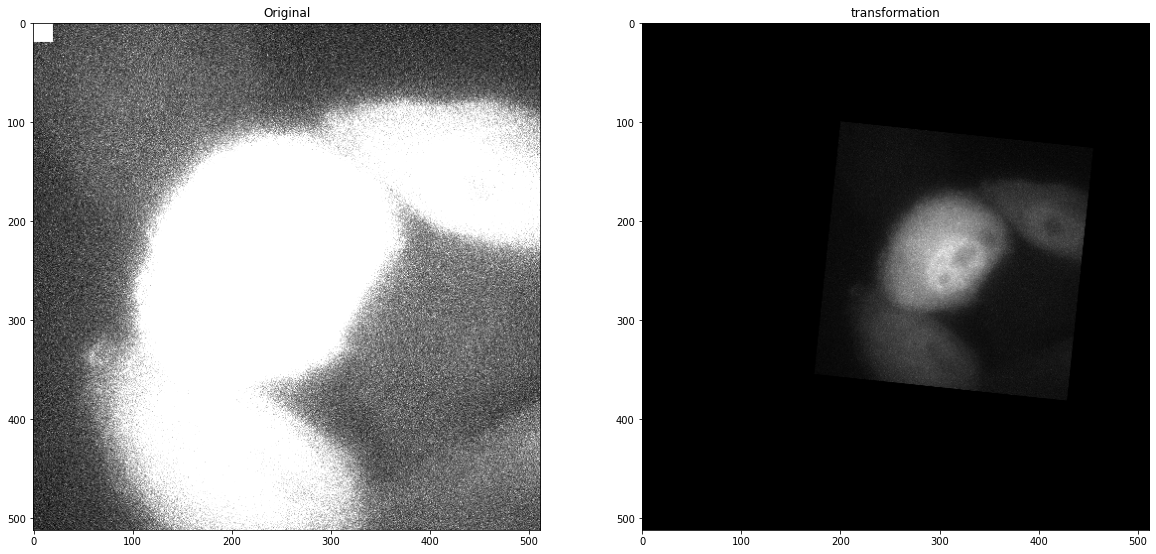

In [34]:
#Task 3
#Make a white box
img2[0:20,0:20]=np.amax(img2)
#transformation matrix
tform = transform.SimilarityTransform(
   scale = 0.50, 
   rotation = np.pi/30, 
   translation = (200,100)# (dx, dy) values for translation
)      
print('Transformation matrix : \n', tform.params , '\n')

# Apply the transformation
img3 = img1 # modify as appropriate
img3 = transform.warp(img1, tform.inverse)
# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img2,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img3,cmap='gray')
ax[1].set_title('transformation')
plt.show()

1.0000000000000007
0.9999999999999989
0.9999999999999988


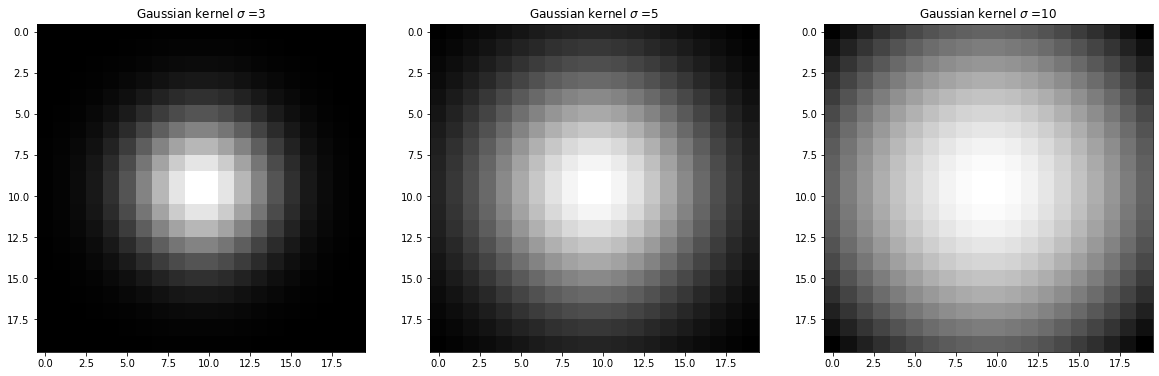

In [54]:
# Section that creates the Gaussian Kernel Matrix
def gaussian_kernel (size_matrix,sigma):
  '''
  This function returns a normalized gaussian kernel matrix
  size_matrix : int
  sigma: float
  '''
  ax = np.linspace(-(size_matrix - 1) / 2., (size_matrix - 1) / 2., size_matrix)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma)) 
  kernel = kernel/kernel.sum() # normalizing to the sum
  return kernel

# Gaussian Kernel matrix for different sigmas.
kernel_gaussian_sigma_3 = gaussian_kernel (size_matrix=20,sigma=3)
kernel_gaussian_sigma_5 = gaussian_kernel (size_matrix=20,sigma=5)
kernel_gaussian_sigma_10 = gaussian_kernel (size_matrix=20,sigma=10)

print(sum(kernel_gaussian_sigma_3.flatten()))
print(sum(kernel_gaussian_sigma_5.flatten()))
print(sum(kernel_gaussian_sigma_10.flatten()))


# Side-by-side comparizon
fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(kernel_gaussian_sigma_3,cmap='gray')
ax[0].set(title='Gaussian kernel $\sigma$ =3')
ax[1].imshow(kernel_gaussian_sigma_5,cmap='gray')
ax[1].set(title='Gaussian kernel $\sigma$ =5')
ax[2].imshow(kernel_gaussian_sigma_10,cmap='gray')
ax[2].set(title='Gaussian kernel $\sigma$ =10')
plt.show()

<ipython-input-58-88cab02b75c4>:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if img_diff_gaussians != []:


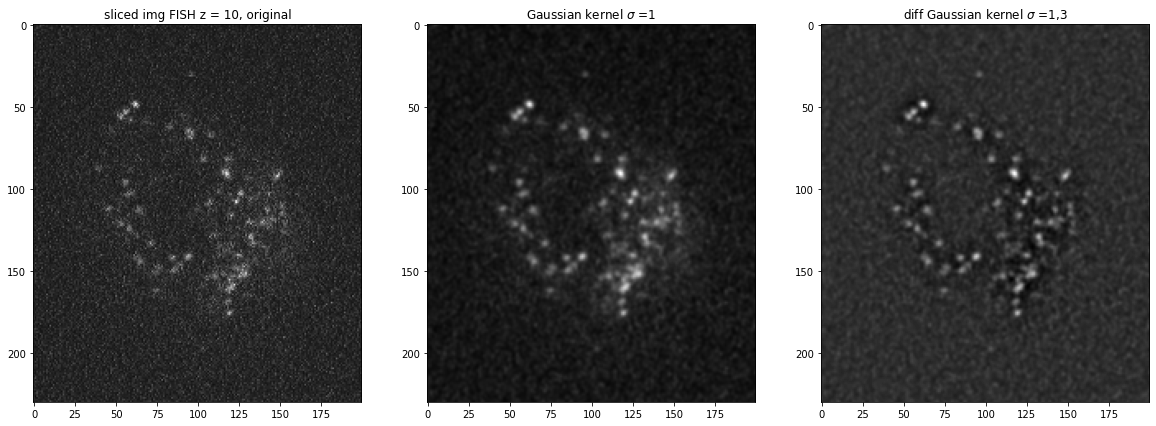

In [58]:
#Task 5
from skimage.filters import difference_of_gaussians
# importing the FISH image as variable img_FISH

# reading the image and saving as variable img
img_FISH = imread('./FISH_example.tif') 
img_FISH.shape
# Make a slice of the sequence of images
img_FISH_slice = img_FISH[10,120:350,50:250] # modify as appropriate
img_gaussian_filter_sigma_1 = gaussian_filter(img_FISH_slice,sigma=1) # modify as appropriate
img_diff_gaussians = difference_of_gaussians(img_FISH_slice,low_sigma=1, high_sigma=5) # modify as appropriate

if img_diff_gaussians != []:
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    ax[0].imshow(img_FISH_slice,cmap='gray')
    ax[0].set(title='sliced img FISH z = 10, original')
    ax[1].imshow(img_gaussian_filter_sigma_1,cmap='gray')
    ax[1].set(title='Gaussian kernel $\sigma$ =1')
    ax[2].imshow(img_diff_gaussians,cmap='gray')
    ax[2].set(title='diff Gaussian kernel $\sigma$ =1,3')
    plt.show()